<a href="https://colab.research.google.com/github/jrbobes/jrbobes-hitl-ml/blob/master/HITL_XAI_Pancreas_DT_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HTIL_Pancreas_XAI_DT_Minimum**

author: jose.bobes at udc.es

Decission tree with the minimum set of parameters.

# Importing required libraries

In [21]:
# Importing Required Libraries
import sys
print('Python: {}'.format(sys.version))

import scipy
print('scipy: {}'.format(scipy.__version__))

import numpy as np
print('numpy: {}'.format(np.__version__))

import re
print('re: {}'.format(re.__version__))

import graphviz
print('graphviz: {}'.format(graphviz.__version__))

import matplotlib
import matplotlib.pyplot as plt
print('matplotlib: {}'.format(matplotlib.__version__))

import pandas as pd
print('pandas: {}'.format(pd.__version__))

import sklearn
print('sklearn: {}'.format(sklearn.__version__))

from sklearn import metrics
from sklearn import tree

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

Python: 3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]
scipy: 1.11.3
numpy: 1.23.5
re: 2.2.1
graphviz: 0.20.1
matplotlib: 3.7.1
pandas: 1.5.3
sklearn: 1.2.2


# Cleaning the Pancreas dataset

In [2]:
# 1. Stablish the FEATURE_NAMES to be used to train the model, except the therapy_type
features = ['ajcc_pathologic_stage', 'ajcc_pathologic_t', 'ajcc_pathologic_m', 'ajcc_pathologic_n', 'primary_diagnosis', 'tissue_or_organ_of_origin', 'age_at_index', 'therapy_type']

In [3]:
# 2. Load the dataset
url = "https://raw.githubusercontent.com/jrbobes/jrbobes-hitl-ml/master/tcga-paad-inicial.csv"

dataset = pd.read_csv(url, sep=';', usecols=features, encoding = "ISO-8859-1")
dataset = dataset.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

print(dataset.shape)
print(dataset.head())

(185, 8)
   therapy_type  age_at_index ajcc_pathologic_m ajcc_pathologic_n  \
0         Other            53                M0                N1   
1         Other            54                MX                N0   
2         Other            58                M1                N0   
3  Chemotherapy            66                M0                N0   
4         Other            64                M0                N0   

  ajcc_pathologic_stage ajcc_pathologic_t                 primary_diagnosis  \
0             Stage IIB                T3  Infiltrating duct carcinoma, NOS   
1             Stage IIA                T3  Infiltrating duct carcinoma, NOS   
2              Stage IV                T3  Infiltrating duct carcinoma, NOS   
3             Stage IIA                T3  Infiltrating duct carcinoma, NOS   
4             Stage IIA                T3  Infiltrating duct carcinoma, NOS   

  tissue_or_organ_of_origin  
0             Pancreas, NOS  
1          Head of pancreas  
2          

In [4]:
# 3. Show Datatypes
for column, dtype in zip(dataset.columns, dataset.dtypes):
    print(f"{column}:{dtype}")

therapy_type:object
age_at_index:int64
ajcc_pathologic_m:object
ajcc_pathologic_n:object
ajcc_pathologic_stage:object
ajcc_pathologic_t:object
primary_diagnosis:object
tissue_or_organ_of_origin:object


In [5]:
# 4. Missing Values/ Null Values
dataset_null = dataset.isnull()
print(dataset.isnull().sum())

therapy_type                 0
age_at_index                 0
ajcc_pathologic_m            0
ajcc_pathologic_n            1
ajcc_pathologic_stage        3
ajcc_pathologic_t            1
primary_diagnosis            0
tissue_or_organ_of_origin    0
dtype: int64


In [6]:
# 5. Fill in the missing values
#dataset.days_to_death = dataset.days_to_death.fillna(18250) # Asignamos un valor muy alto (50 años)
dataset.ajcc_pathologic_stage = dataset.ajcc_pathologic_stage.fillna('Stage 0')
dataset.ajcc_pathologic_t = dataset.ajcc_pathologic_t.fillna('TX')
dataset.ajcc_pathologic_m = dataset.ajcc_pathologic_m.fillna('MX')
dataset.ajcc_pathologic_n = dataset.ajcc_pathologic_n.fillna('NX')

dataset_null = dataset.isnull()
print(dataset.isnull().sum())

therapy_type                 0
age_at_index                 0
ajcc_pathologic_m            0
ajcc_pathologic_n            0
ajcc_pathologic_stage        0
ajcc_pathologic_t            0
primary_diagnosis            0
tissue_or_organ_of_origin    0
dtype: int64


In [7]:
# 6. Removing Redundancy
count_duplicates = dataset[dataset.duplicated()].shape[0]
print("Number of duplicate rows:", count_duplicates)

Number of duplicate rows: 19


In [8]:
# There is one duplicate with the columns selected.
dataset[dataset.duplicated()]

therapy_type  age_at_index ajcc_pathologic_m ajcc_pathologic_n  \
37   Chemotherapy            71                M0                N1   
55   Chemotherapy            76                MX                N1   
72   Chemotherapy            63                M0                N1   
78   Chemotherapy            77                MX                N1   
82   Chemotherapy            72                M0                N1   
86   Chemotherapy            72                M0                N1   
91          Other            65                MX                N1   
97          Other            61                MX                N1   
113  Chemotherapy            64                M0                N1   
117  Chemotherapy            56                M0                N1   
124  Chemotherapy            50                MX                N1   
127         Other            52                M0                N1   
137  Chemotherapy            75                MX                N1   
142  Chemotherapy            69                MX                N1   
147  Chemotherapy            71                M0                N1   
152  Chemotherapy            71                M0                N1   
154  Chemotherapy            49                M0                N1   
156  Chemotherapy            77                MX                N1   
171  Chemotherapy            65                MX                N1   

    ajcc_pathologic_stage ajcc_pathologic_t                 primary_diagnosis  \
37              Stage IIB                T3  Infiltrating duct carcinoma, NOS   
55              Stage IIB                T3  Infiltrating duct carcinoma, NOS   
72              Stage IIB                T3  Infiltrating duct carcinoma, NOS   
78              Stage IIB                T3               Adenocarcinoma, NOS   
82              Stage IIB                T3  Infiltrating duct carcinoma, NOS   
86              Stage IIB                T3  Infiltrating duct carcinoma, NOS   
91              Stage IIB                T3  Infiltrating duct carcinoma, NOS   
97              Stage IIB                T3  Infiltrating duct carcinoma, NOS   
113             Stage IIB                T3  Infiltrating duct carcinoma, NOS   
117             Stage IIB                T3  Infiltrating duct carcinoma, NOS   
124             Stage IIB                T3  Infiltrating duct carcinoma, NOS   
127             Stage IIB                T3  Infiltrating duct carcinoma, NOS   
137             Stage IIB                T3  Infiltrating duct carcinoma, NOS   
142             Stage IIB                T3  Infiltrating duct carcinoma, NOS   
147             Stage IIB                T3  Infiltrating duct carcinoma, NOS   
152             Stage IIB                T3  Infiltrating duct carcinoma, NOS   
154             Stage IIB                T3  Infiltrating duct carcinoma, NOS   
156             Stage IIB                T3  Infiltrating duct carcinoma, NOS   
171             Stage IIB                T3  Infiltrating duct carcinoma, NOS   

    tissue_or_organ_of_origin  
37           Head of pancreas  
55           Head of pancreas  
72           Head of pancreas  
78           Head of pancreas  
82           Head of pancreas  
86           Head of pancreas  
91           Head of pancreas  
97           Head of pancreas  
113          Head of pancreas  
117          Head of pancreas  
124          Head of pancreas  
127          Head of pancreas  
137          Head of pancreas  
142          Head of pancreas  
147          Head of pancreas  
152          Head of pancreas  
154             Pancreas, NOS  
156          Head of pancreas  
171          Head of pancreas

# Data Preparation

In [9]:
# 1. Simplify Target with only Chemotherapy or Other
dataset['therapy_type'] = dataset['therapy_type'].replace('Hormone Therapy', 'Other')
dataset['therapy_type'] = dataset['therapy_type'].replace('Vaccine', 'Other')
dataset['therapy_type'] = dataset['therapy_type'].replace('Ancillary', 'Other')

# check that we only get two values: 'Chemotherapy' and 'Other'
dataset['therapy_type'].unique()

array(['Other', 'Chemotherapy'], dtype=object)

In [10]:
# 2. Convert categorical variables into numerical.
# Categorical features need to be transformed before they can be used in a model.

dataset['ajcc_pathologic_stage'] = dataset['ajcc_pathologic_stage'].replace('Stage 0', 0)
dataset['ajcc_pathologic_stage'] = dataset['ajcc_pathologic_stage'].replace('Stage I', 1)
dataset['ajcc_pathologic_stage'] = dataset['ajcc_pathologic_stage'].replace('Stage IA', 2)
dataset['ajcc_pathologic_stage'] = dataset['ajcc_pathologic_stage'].replace('Stage IB', 3)
dataset['ajcc_pathologic_stage'] = dataset['ajcc_pathologic_stage'].replace('Stage II', 4)
dataset['ajcc_pathologic_stage'] = dataset['ajcc_pathologic_stage'].replace('Stage IIA', 5)
dataset['ajcc_pathologic_stage'] = dataset['ajcc_pathologic_stage'].replace('Stage IIB', 6)
dataset['ajcc_pathologic_stage'] = dataset['ajcc_pathologic_stage'].replace('Stage III', 7)
dataset['ajcc_pathologic_stage'] = dataset['ajcc_pathologic_stage'].replace('Stage IV', 8)

dataset['ajcc_pathologic_t'] = dataset['ajcc_pathologic_t'].replace('TX', 0)
dataset['ajcc_pathologic_t'] = dataset['ajcc_pathologic_t'].replace('T1', 1)
dataset['ajcc_pathologic_t'] = dataset['ajcc_pathologic_t'].replace('T2', 2)
dataset['ajcc_pathologic_t'] = dataset['ajcc_pathologic_t'].replace('T3', 3)
dataset['ajcc_pathologic_t'] = dataset['ajcc_pathologic_t'].replace('T4', 4)

dataset['ajcc_pathologic_n'] = dataset['ajcc_pathologic_n'].replace('N0', 0)
dataset['ajcc_pathologic_n'] = dataset['ajcc_pathologic_n'].replace('N1', 1)
dataset['ajcc_pathologic_n'] = dataset['ajcc_pathologic_n'].replace('N1b', 2)
dataset['ajcc_pathologic_n'] = dataset['ajcc_pathologic_n'].replace('NX', 3)

dataset['ajcc_pathologic_m'] = dataset['ajcc_pathologic_m'].replace('M0', 0)
dataset['ajcc_pathologic_m'] = dataset['ajcc_pathologic_m'].replace('M1', 1)
dataset['ajcc_pathologic_m'] = dataset['ajcc_pathologic_m'].replace('MX', 2)

In [11]:
# 3. Drop unneeded Features
# Remove therapy_type from the X vector, and keep it as the target.
X = dataset.drop(['therapy_type'], axis=1)
y = dataset['therapy_type']

In [12]:
# 4. Use One-hot encoding for the rest of categorical features. We get a binary variable for each category.
X_encoded = pd.get_dummies(X)

In [13]:
# 5. Split the data in train and test sets
X_train,X_test,y_train,y_test = train_test_split(X_encoded, y, test_size=0.3,random_state=42)

# Creating a Decision Tree model

In [14]:
# l. Create the Decision Tree model and fit the training data
dt_clf = tree.DecisionTreeClassifier(random_state=42, max_depth=6, min_samples_leaf=5)
dt_clf = dt_clf.fit(X_train, y_train)

In [15]:
# 2. Predict over the test data and show accuracy
y_dt_pred = dt_clf.predict(X_test)
dt_acc = metrics.accuracy_score(y_test, y_dt_pred)
print("Decision Tree accuracy: ", dt_acc)

Decision Tree accuracy:  0.6607142857142857


In [16]:
# 3. Optimizing the hyperparameters
best_acc = 0

for criterion in "gini", "entropy":
    for max_depth in [2,3,4,5,6]:
        for min_samples_leaf in [5, 10, 20, 30]:
            dtree = tree.DecisionTreeClassifier(max_depth=max_depth, criterion=criterion, min_samples_leaf=min_samples_leaf)
            dtree.fit(X_train, y_train)
            predicitions = dtree.predict(X_test)
            acc = metrics.accuracy_score(y_test, predicitions)
            if acc > best_acc:
                best_params = f"criterion: {criterion}, max_depth: {max_depth}, min_samples_leaf: {min_samples_leaf}"
                best_acc = acc

In [17]:
print("Decision Tree Best Parameters: ", best_params)
print("Decision Tree Best Accuracy: ", best_acc)

Decision Tree Best Parameters:  criterion: gini, max_depth: 2, min_samples_leaf: 10
Decision Tree Best Accuracy:  0.6785714285714286


In [18]:
# 4. Show Classification Report
print(metrics.classification_report(y_test, y_dt_pred))

              precision    recall  f1-score   support

Chemotherapy       0.65      0.94      0.77        34
       Other       0.71      0.23      0.34        22

    accuracy                           0.66        56
   macro avg       0.68      0.58      0.56        56
weighted avg       0.68      0.66      0.60        56



In [19]:
# 4. Get textual representation of the tree model
#Force the feature names to be a list: https://stackoverflow.com/questions/72178276/error-on-export-text-for-decision-tree-sklearn
dt_text_representation = tree.export_text(dt_clf,feature_names=X_encoded.columns.tolist())
print(dt_text_representation)

|--- primary_diagnosis_Neuroendocrine carcinoma, NOS <= 0.50
|   |--- age_at_index <= 79.50
|   |   |--- age_at_index <= 62.50
|   |   |   |--- age_at_index <= 59.50
|   |   |   |   |--- age_at_index <= 56.50
|   |   |   |   |   |--- ajcc_pathologic_stage <= 5.50
|   |   |   |   |   |   |--- class: Chemotherapy
|   |   |   |   |   |--- ajcc_pathologic_stage >  5.50
|   |   |   |   |   |   |--- class: Chemotherapy
|   |   |   |   |--- age_at_index >  56.50
|   |   |   |   |   |--- age_at_index <= 57.50
|   |   |   |   |   |   |--- class: Chemotherapy
|   |   |   |   |   |--- age_at_index >  57.50
|   |   |   |   |   |   |--- class: Chemotherapy
|   |   |   |--- age_at_index >  59.50
|   |   |   |   |--- ajcc_pathologic_stage <= 5.50
|   |   |   |   |   |--- class: Chemotherapy
|   |   |   |   |--- ajcc_pathologic_stage >  5.50
|   |   |   |   |   |--- class: Other
|   |   |--- age_at_index >  62.50
|   |   |   |--- ajcc_pathologic_stage <= 4.00
|   |   |   |   |--- class: Chemotherapy
|

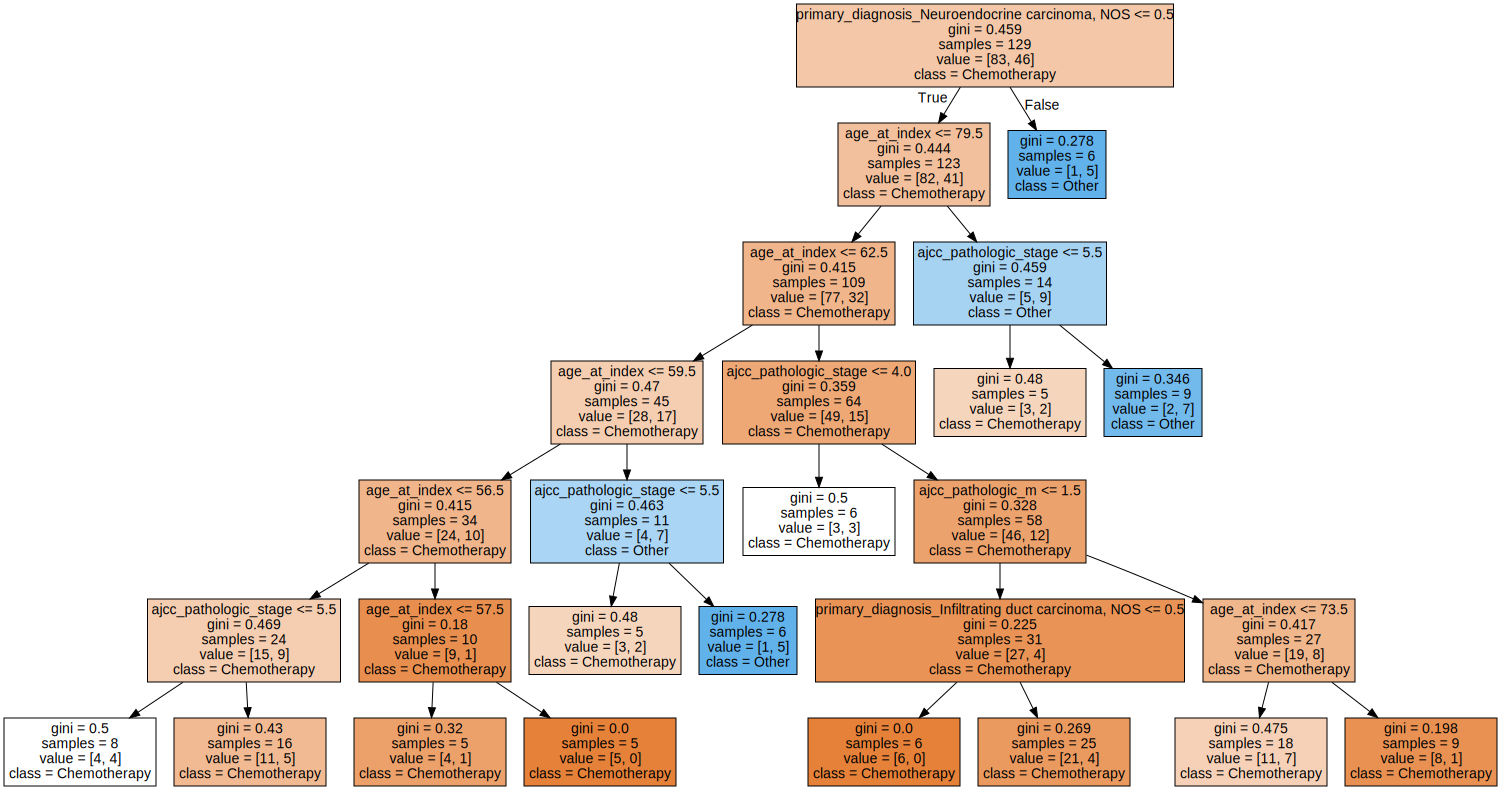

In [22]:
# 5. Visualize graph with graphviz library
dot_data = tree.export_graphviz(dt_clf, out_file=None, feature_names= X_encoded.columns, class_names=['Chemotherapy', 'Other'], filled=True)
dt_graph = graphviz.Source(dot_data, format="png")
dt_graph

In [25]:
# 6. Export DT as an image
dt_graph.format = "png"
dt_graph.render("paad_decision_tree")

'paad_decision_tree.png'

# Permutation Importance

Permutation Importance is an algorithm that computes importance scores
for each of the feature variables of a dataset. The importance measures are determined by computing the sensitivity of a model to random permutations of feature values.

It measures the importance of a feature by calculating the increase in the model’s prediction error after permuting the feature.

In [26]:
# 1. Install required package
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107719 sha256=aceeffc97e6079b42bf29cb6838322db0e3d7ae13dfd09555116aa1200259994
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [27]:
# 2. Get permutation importance data and show weights
dt_perm = PermutationImportance(dt_clf, random_state=42).fit(X_test, y_test)
eli5.show_weights(dt_perm, feature_names = X_encoded.columns.tolist())

In [28]:
# 3. Patient 3 data
eli5.show_prediction(dt_clf, X_train.iloc[2])

In [29]:
# 4. Patient 4 data
eli5.show_prediction(dt_clf, X_train.iloc[3])

# Exaplainability with SHAP

In [30]:
!pip install shap
import shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 4.4 MB/s eta 0:00:00


In [31]:
# Explain the model's predictions using SHAP
explainerShap = shap.TreeExplainer(dt_clf)

# Compute shap_values for X_test
shap_values = explainerShap.shap_values(X_test)

**Pacient 3**
Get the data from patient 3

In [32]:
paciente3 = X_encoded.loc[[2]]
paciente3

age_at_index  ajcc_pathologic_m  ajcc_pathologic_n  ajcc_pathologic_stage  \
2            58                  1                  0                      8   

   ajcc_pathologic_t  primary_diagnosis_Adenocarcinoma with mixed subtypes  \
2                  3                                                  0      

   primary_diagnosis_Adenocarcinoma, NOS  \
2                                      0   

   primary_diagnosis_Carcinoma, undifferentiated, NOS  \
2                                                  0    

   primary_diagnosis_Infiltrating duct carcinoma, NOS  \
2                                                  1    

   primary_diagnosis_Mucinous adenocarcinoma  \
2                                          0   

   primary_diagnosis_Neuroendocrine carcinoma, NOS  \
2                                                0   

   tissue_or_organ_of_origin_Body of pancreas  \
2                                           0   

   tissue_or_organ_of_origin_Head of pancreas  \
2                                           0   

   tissue_or_organ_of_origin_Overlapping lesion of pancreas  \
2                                                  0          

   tissue_or_organ_of_origin_Pancreas, NOS  \
2                                        0   

   tissue_or_organ_of_origin_Tail of pancreas  
2                                           1

In [33]:
y[2]

'Other'

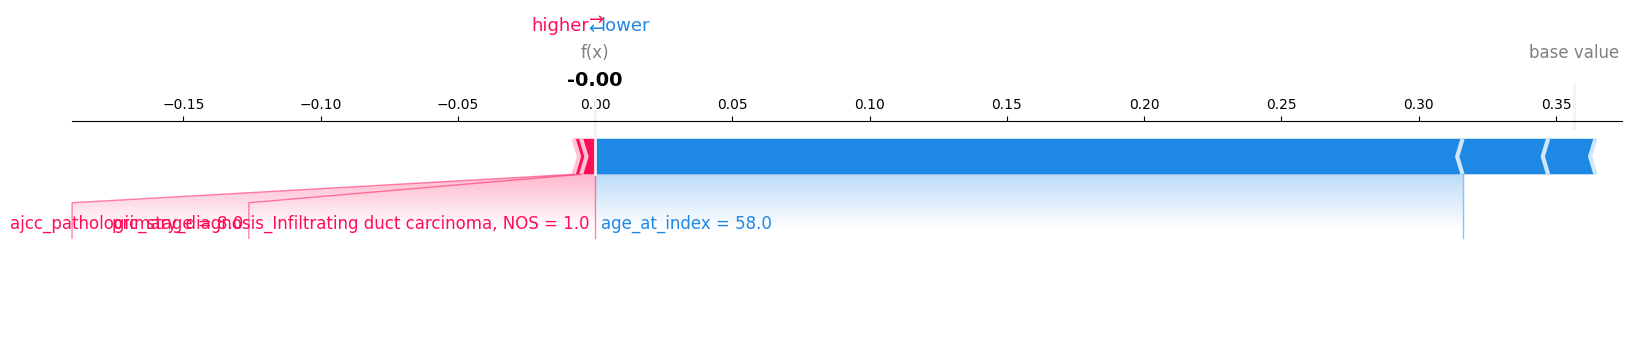

In [34]:
shap.initjs()
paciente3_shap_values = explainerShap.shap_values(paciente3)

shap.force_plot(explainerShap.expected_value[1], paciente3_shap_values[1], paciente3, matplotlib = True, show=False)

In [35]:
#plt.savefig("shap_paciente3.png")
plt.close()

Paciente 4

In [36]:
paciente4 = X_encoded.loc[[3]]
paciente4

age_at_index  ajcc_pathologic_m  ajcc_pathologic_n  ajcc_pathologic_stage  \
3            66                  0                  0                      5   

   ajcc_pathologic_t  primary_diagnosis_Adenocarcinoma with mixed subtypes  \
3                  3                                                  0      

   primary_diagnosis_Adenocarcinoma, NOS  \
3                                      0   

   primary_diagnosis_Carcinoma, undifferentiated, NOS  \
3                                                  0    

   primary_diagnosis_Infiltrating duct carcinoma, NOS  \
3                                                  1    

   primary_diagnosis_Mucinous adenocarcinoma  \
3                                          0   

   primary_diagnosis_Neuroendocrine carcinoma, NOS  \
3                                                0   

   tissue_or_organ_of_origin_Body of pancreas  \
3                                           0   

   tissue_or_organ_of_origin_Head of pancreas  \
3                                           0   

   tissue_or_organ_of_origin_Overlapping lesion of pancreas  \
3                                                  0          

   tissue_or_organ_of_origin_Pancreas, NOS  \
3                                        1   

   tissue_or_organ_of_origin_Tail of pancreas  
3                                           0

In [37]:
y[3]

'Chemotherapy'

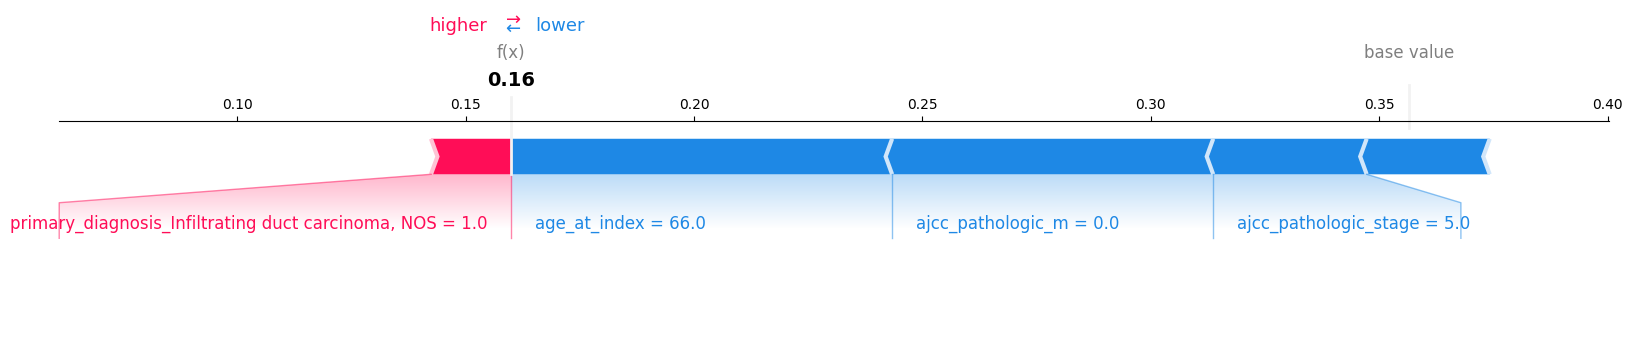

In [38]:
paciente4_shap_values = explainerShap.shap_values(paciente4)

shap.force_plot(explainerShap.expected_value[1], paciente4_shap_values[1], paciente4, matplotlib = True, show=False)

Feature values in pink cause to increase the prediction. Size of the bar shows the magnitude of the feature's effect.

Feature values in blue causse to decrease the prediction. Sum of all feature SHAP values explain why model prediction was different from the baseline.

In [39]:
#plt.savefig("shap_paciente4.png")
plt.close()

Summary plot will give us the variable importance plot. Features with high predicting power are shown at the top and the ones with low predicting powers are shown at the bottom.

We could see the contribution of each data into the prediction probability. The redder the colour, the higher the value and vice versa. Also, when the value is on the positive side, it contributes to the class 0 prediction result probability and vice versa.

Variable Importance Plot - Global Interpretation


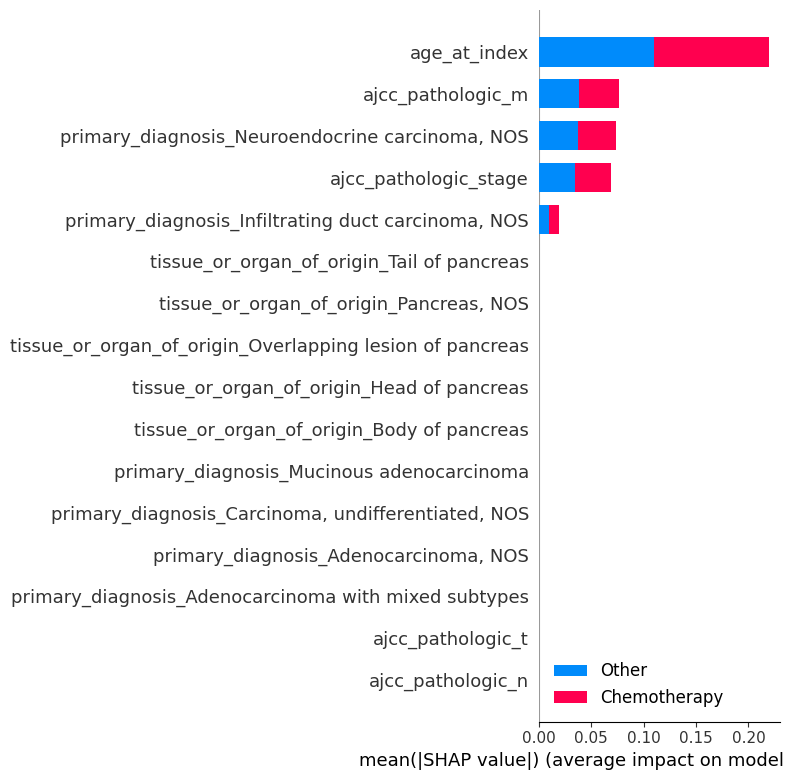

In [40]:
print("Variable Importance Plot - Global Interpretation")
shap.summary_plot(shap_values, X_test, plot_type='bar', class_names=['Chemotherapy','Other'])

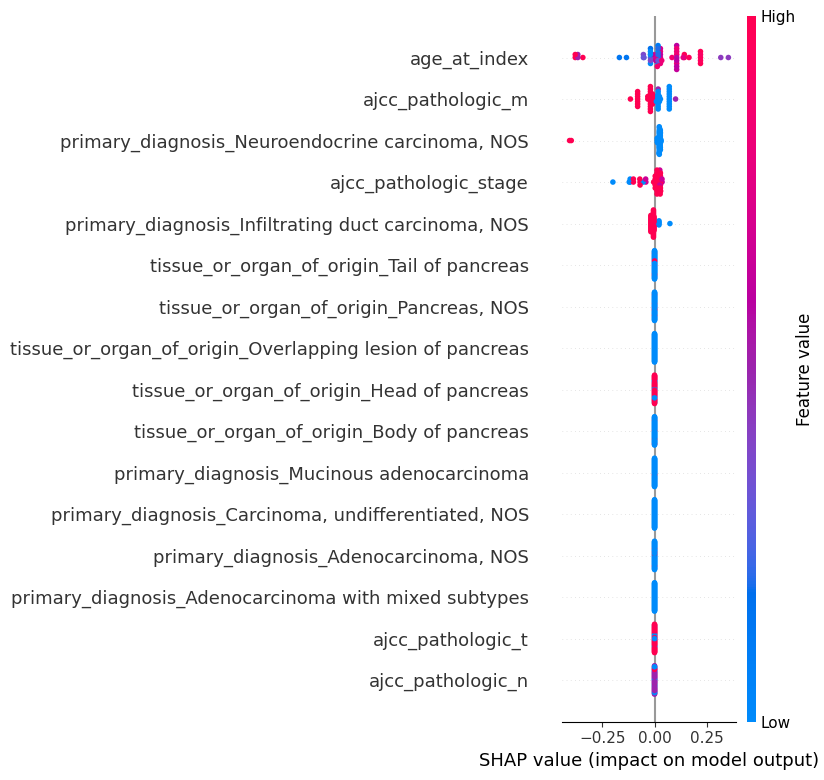

In [41]:
# Summary plot in an individual sample
shap.summary_plot(shap_values[0], X_test)

The **partial dependence plot** is a global method: The method considers all instances and gives a statement about the global relationship of a feature with the predicted outcome.

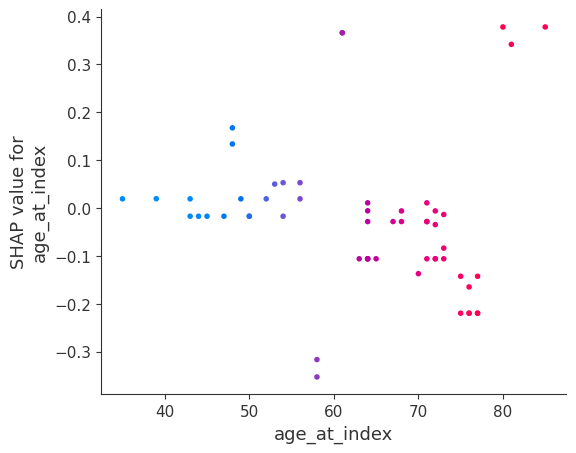

In [42]:
shap.dependence_plot('age_at_index', shap_values[1], X_test, interaction_index='age_at_index')

A continuación incluimos un gráfico de decisión:

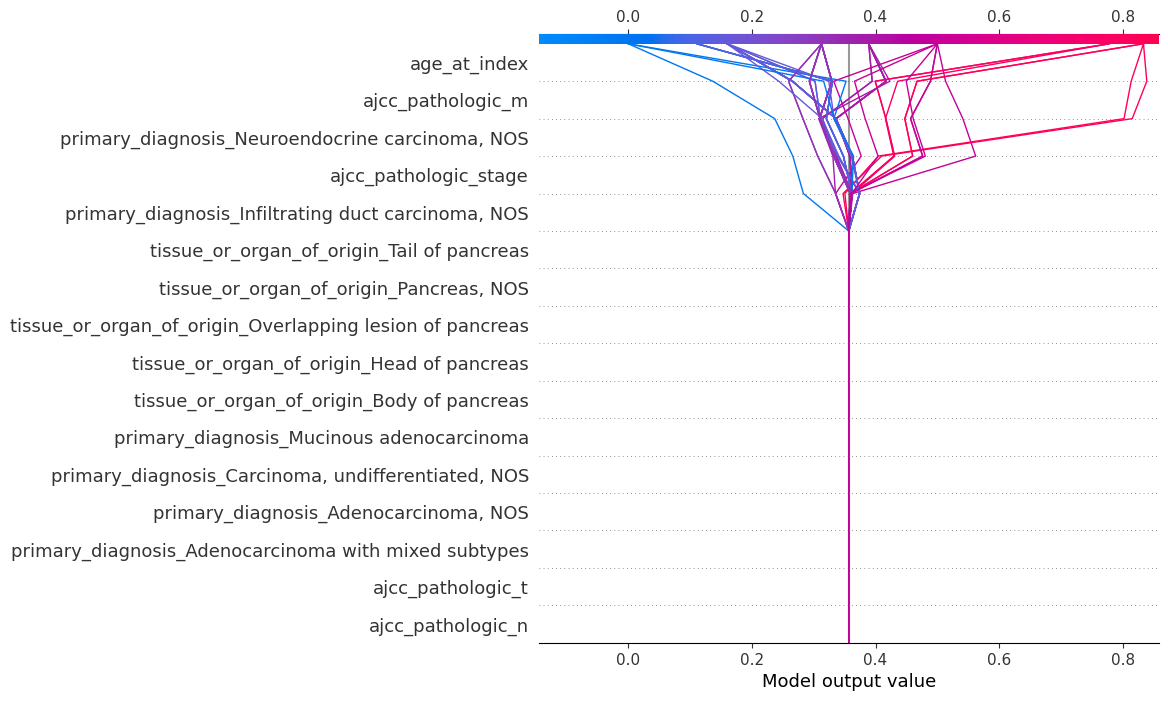

In [43]:
i=1
shap.decision_plot(explainerShap.expected_value[i], shap_values[i], feature_names = list(X_encoded.columns))

Y finalmente un gráfico de fuerzas:

In [44]:
shap.initjs()
i = 1
shap.force_plot(explainerShap.expected_value[i], shap_values[i], feature_names = list(X_encoded.columns))

# Explainability with LIME

LIME (Local Interpretable Model-Agnostic Explanations) is a method for explaining the predictions of any classifier and regressor (model agnostic).

In [45]:
# Install SHAP (SHapley Additive exPlanations).
!pip install lime

# Import required libraries
from lime.lime_tabular import LimeTabularExplainer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=134df399a51229ad54776a8c62ee60663c7af4f87010ed622472da56a99e97ab
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [46]:
# XAI with LIME (Local Interpretable Model-agnostic Explanations)
explainerLime = LimeTabularExplainer(X_encoded.values, feature_names=X_encoded.columns, class_names = ['Chemotherapy', 'Other'], discretize_continuous=True)
#explainer2 = LimeTabularExplainer(X_encoded.values[:,:], feature_names = X_encoded.columns,class_names=['Chemotherapy','Other'], discretizer='decile',kernel_width=5,discretize_continuous=True,verbose=True)

# Patient 3 LIME explanation
expPatient3 = explainerLime.explain_instance(X_encoded.values[2], dt_clf.predict_proba, num_features=10, top_labels=5)
#exp2 = explainer2.explain_instance(X_encoded.iloc[1,:],rf_clf.predict_proba)

expPatient3.show_in_notebook(show_all=True)
expPatient3.as_pyplot_figure()
plt.close()


X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


In [47]:
# Patient 4 LIME explanation
expPatient4 = explainerLime.explain_instance(X_encoded.values[3], dt_clf.predict_proba, num_features=10, top_labels=3)
expPatient4.show_in_notebook(show_all=True)
expPatient4.as_pyplot_figure()
plt.close()

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


# Partial Dependence Plot (PDP)
Partial Dependence (PD) is a global and model-agnostic XAI method. PDP shows the marginal effect or contribution of individual feature(s) to the predictive value of your black box model.

Caveat: It is assumed that the feature(s) for which the partial dependence is computed are not correlated with other features.

REF: https://towardsdatascience.com/partial-dependence-plots-with-scikit-learn-966ace4864fc

In [48]:
from sklearn.inspection import PartialDependenceDisplay
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Set2')

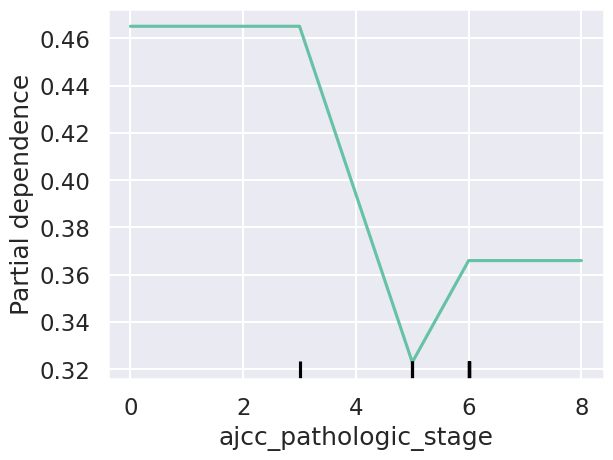

In [49]:
disp1 = PartialDependenceDisplay.from_estimator(dt_clf, X_train, ['ajcc_pathologic_stage'])
plt.show()
plt.close()

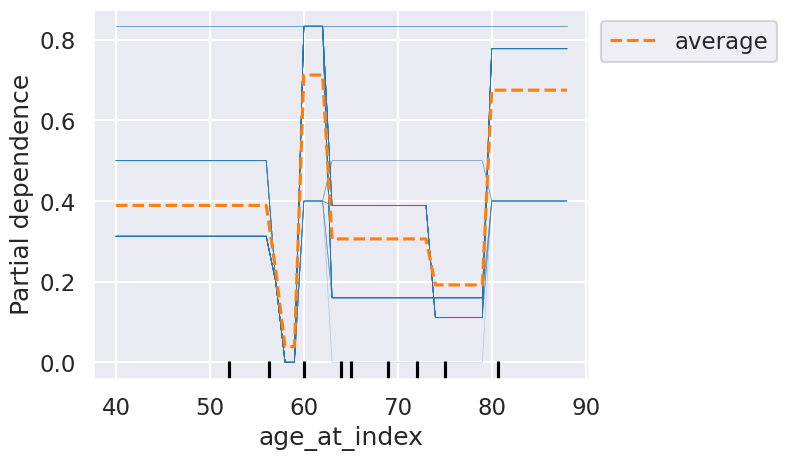

In [50]:
n = 50
PartialDependenceDisplay.from_estimator(
    dt_clf, X_train, ['age_at_index'], kind="both", n_jobs=3, subsample=n
)
plt.legend(bbox_to_anchor=(1,1));
plt.show()
plt.close()

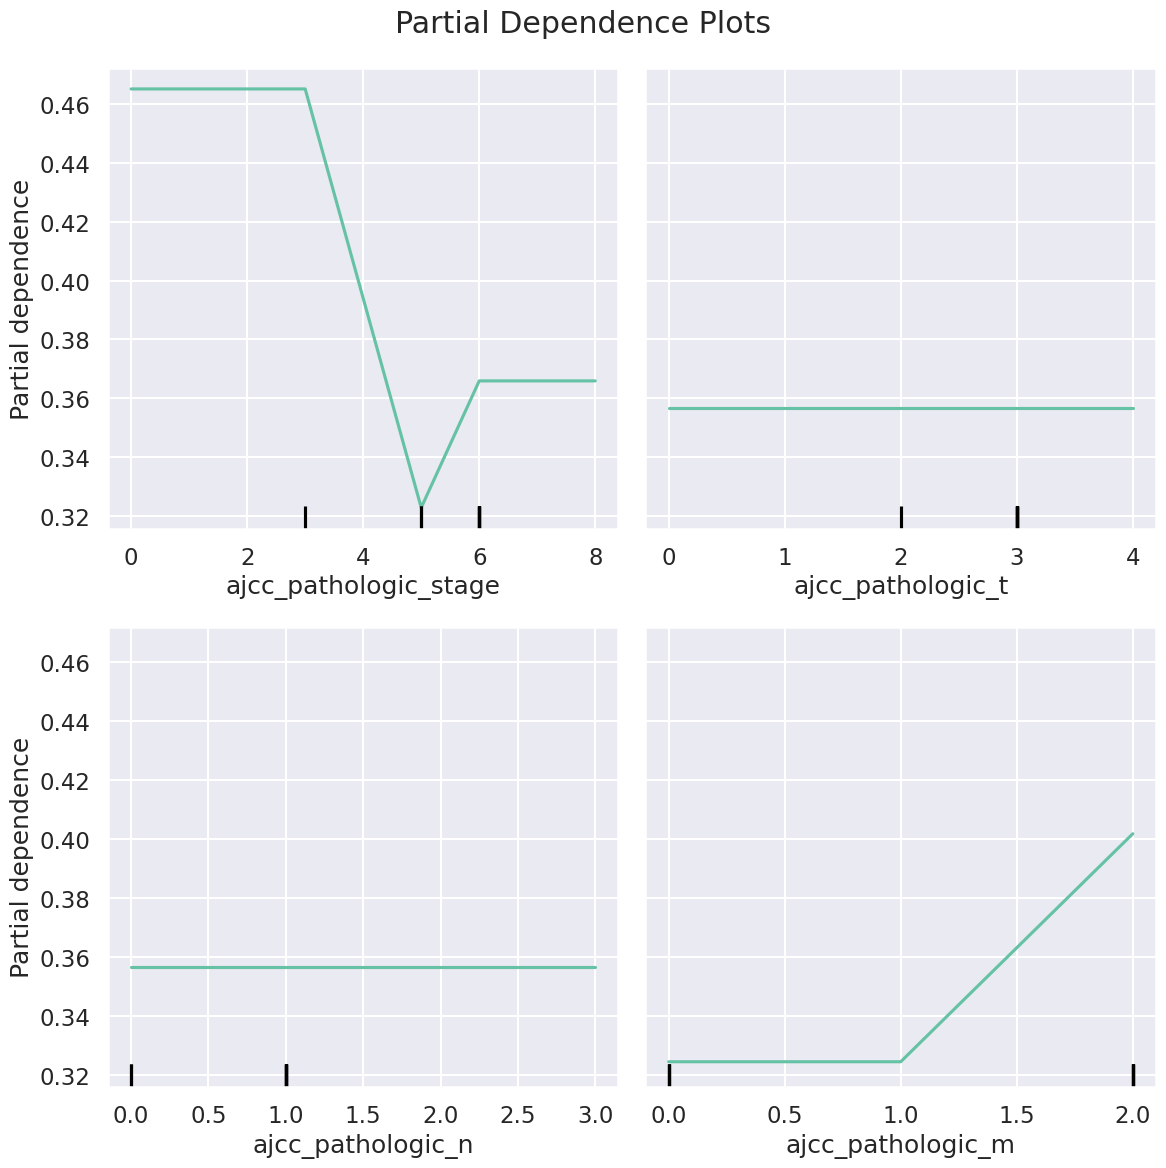

In [51]:
n_cols = 2
n_rows = 2
fig, ax = plt.subplots(n_rows, n_cols, figsize=(12, 12))
PartialDependenceDisplay.from_estimator(dt_clf, X_train,
  ['ajcc_pathologic_stage', 'ajcc_pathologic_t', 'ajcc_pathologic_n', 'ajcc_pathologic_m'], ax=ax)
fig.suptitle('Partial Dependence Plots')
fig.tight_layout();
plt.show()
plt.close()